<a href="https://colab.research.google.com/github/vksyr/IST718/blob/master/Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import math

from pandas import Series
from statistics import mean
from statistics import median

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
kc_311_calls = pd.read_csv('/content/drive/My Drive/IST718/311_Call_Center_Service_Requests.csv') # large
#kc_311_survey = pd.read_csv('/content/sample_data/KC_311_Call_Center_Service_Requests_Survey_Data.csv')
#kc_calls = pd.read_csv('/content/sample_data/KC_Daily_Call_Activity_Report.csv')
kc_budget = pd.read_csv('/content/drive/My Drive/IST718/Budget_for_budget.kcmo.gov.csv')

In [0]:
kc_budget.Department.unique()

array(['Police', 'Water Services', 'General Services', 'Health', 'Fire',
       'Municipal Court', 'Neighborhoods and Housing Services',
       'Parks and Recreation', 'Public Works', 'Aviation', 'Law',
       'Finance', 'Convention and Entertainment Facilities',
       'City Planning and Development', 'Office of the City Manager',
       'Health and Medical Care', 'Human Relations',
       'Transportation Authorities', 'Human Resources',
       'Office of the City Clerk', 'Boards of Election Commissioners',
       'Convention and Tourism', 'Economic Development',
       'Office of the City Auditor', 'Offices of Mayor and Council',
       'Contingent Appropriation'], dtype=object)

Totals

In [0]:
kc_311_calls.DEPARTMENT.value_counts()

NHS                                    722181
Public Works                           328815
Water Services                         196823
Parks and Rec                           81047
KCPD                                    32411
Health                                  31064
City Planning and Development           11394
City Managers Office                    10483
NCS                                      6391
Northland                                4966
Finance                                  1513
Parks & Rec                               861
Fire                                      562
General Service                           464
Housing Community Dev                     342
South                                     295
Aviation                                  145
Convention and Entertainment Center        51
Information Technology                     19
Parks & Recreation                         11
Municipal Court                             8
IT                                

Groupings

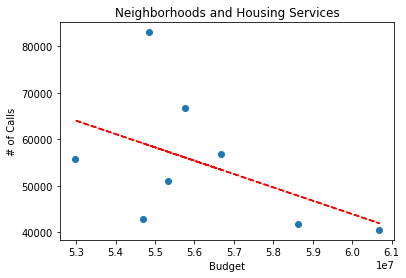

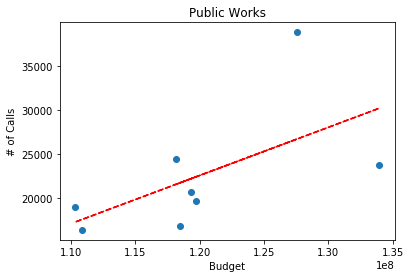

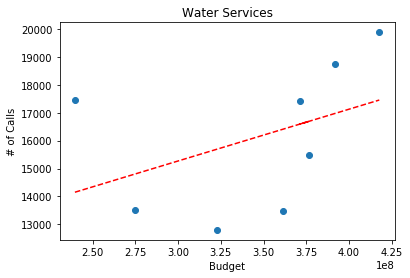

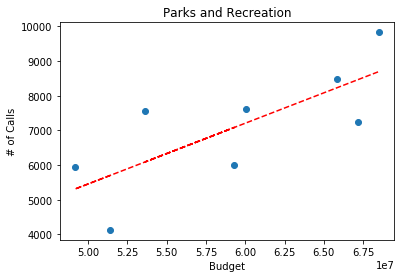

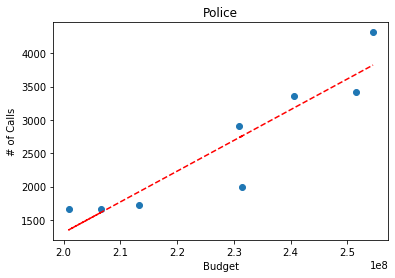

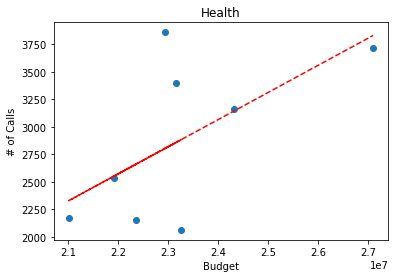

In [0]:
kc_311_calls_12_19 = kc_311_calls[(kc_311_calls['CREATION YEAR']>=2012) & (kc_311_calls['CREATION YEAR']<=2019)]


# 311 calls
groups = kc_311_calls_12_19.groupby(["DEPARTMENT", "CREATION YEAR"])
call_totals = pd.DataFrame({'Total' : groups.size()}).reset_index()

# Budget
groups = kc_budget.groupby(["Department", "Fiscal Year"])["Approved Amount"]
budget_totals = pd.DataFrame({'Total' : groups.sum()}).reset_index()



#Budget vs calls 

# dept matching between datasets
sync = [
  {'budget':'Neighborhoods and Housing Services', 'call':'NHS'}, 
  {'budget':'Public Works', 'call':'Public Works'},
  {'budget':'Water Services', 'call':'Water Services'}, 
  {'budget':'Parks and Recreation', 'call':'Parks and Rec'},
  {'budget':'Police', 'call':'KCPD'}, 
  {'budget':'Health', 'call':'Health'}
]

for s in range(0, len(sync)):

  budget_totals_sub = budget_totals[budget_totals['Department']==sync[s]['budget']]
  call_totals_sub = call_totals[call_totals['DEPARTMENT']==sync[s]['call']]

  # Plot
  plt.scatter(budget_totals_sub.Total, call_totals_sub.Total)
  plt.title(sync[s]['budget'])
  plt.xlabel('Budget')
  plt.ylabel('# of Calls')

  z = np.polyfit(budget_totals_sub.Total, call_totals_sub.Total, 1)
  p = np.poly1d(z)
  plt.plot(budget_totals_sub.Total,p(budget_totals_sub.Total),"r--")


  plt.show()

